#Step-1: importing the library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ssl #This module provides access to Transport Layer Security (often known as “Secure Sockets Layer”) encryption and peer authentication facilities for network sockets, both client-side and server-side.
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt

# The CIFAR-10 dataset

   * The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

   * The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
   

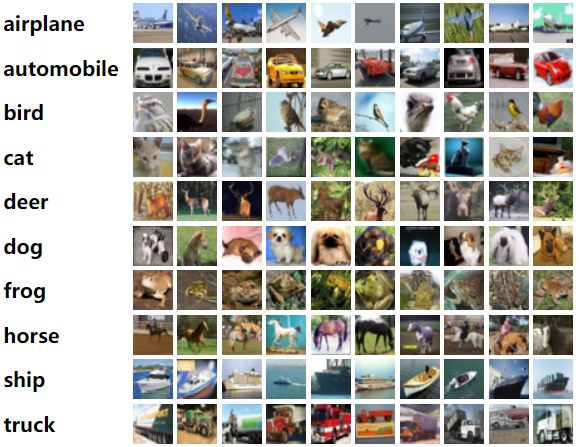

# Step- 2: Importing CIFAR-10 dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

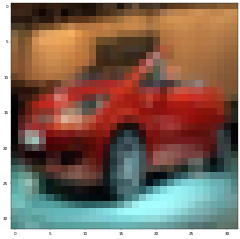

In [ ]:
# car
plt.figure(figsize = (10,10),dpi = 30 )
plt.imshow(x_train[45])

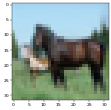

In [ ]:
#Horse
plt.figure(figsize = (6,4),dpi = 32 )
plt.imshow(x_train[12])

# **Pre-Processing**

# Step -3: Scaling dataset

**Checking the shape of the training dataset**

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
#checking the maximum values train dataset
x_train.max()

255

In [ ]:
#checking the minimum values
x_train.min()

0

In [ ]:
#checking the maximum values test dataset
x_test.max()

255

**Step-4:**
  * We can scale the data to the range between 0 and 1 by dividing it by 255.

In [ ]:
x_train = x_train/x_train.max()

In [ ]:
x_test = x_test/x_test.max()

**Step-5:**
   * To find the number of unique elements in the output labels


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

# **Label**

**Step-5:**

   * encoding the categorical data in the dependent varible.

   * Converts a class vector (integers) to binary class matrix.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[9]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **Building the Model**

###1. Sequential. 

The core idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.

###2. Dense

Dense layer, also called fully-connected layer, refers to the layer whose inside neurons connect to every neuron in the preceding layer.

###3. Conv2D

Conv2D parameter is the numbers of filters that convolutional layers will learn from. It is an integer value and also determines the number of output filters in the convolution. Here we are learning a total of 32 filters and then we use Max Pooling to reduce the spatial dimensions of the output volume.

###4. Flatten

Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.

###5. MaxPooling

PyTorch MaxPool2d is the class of PyTorch that is used in neural networks for pooling over specified signal inputs which internally contain various planes of input. It accepts various parameters in the class definition which include dilation, ceil mode, size of kernel, stride, dilation, padding, and return indices.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.layers import Dropout

**Step-6:**

  * creating Sequential object.

In [ ]:
model = Sequential()

**a)** We are adding the first convolution layers, keranel_size is (4,4) and activation function is **relu**.

 **b)** we are applying the max pooling method further to taking the important featrues at the same time we are reducing the features. 

In [ ]:
# FIRST SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = (32,32,3), activation = 'relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
model.add(Dropout(0.2))

**c)** we are creating the Second covolution layers.

In [ ]:
## SECOND SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = (32,32,3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)))

#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
## third SET OF LAYERS

# CONVOLUTION LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = (32,32,3), activation = 'relu',kernel_regularizer=regularizers.l2(l=0.01)))

#Pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

In [ ]:
model.add(Dropout(0.1))

**d)** Flatten images 

In [ ]:
# Flatten  images from 28 by 28  to 764 BEFORE FINAL LAYER
model.add(Flatten())

**E)** first dense hidden layer with 256 unites.

In [ ]:
# 256 Neurons in dense hidden layer ()
model.add(Dense(256,activation = 'relu'))

**F)** Output layer

In [ ]:
# last layer is the classifier, THUS 10 possible classes
model.add(Dense(10, activation = 'softmax'))

**Step-7:**  Complie model

**Why we use categorical_crossentropy and rmsprop here?**
   
   * Used as a loss function for multi-class classification model where there are two or more output labels.In taht case we should use the categorical_crossentropy.

   * **(rmsprop)** ---> The RMSprop optimizer is similar to the gradient descent algorithm with momentum. 

In [ ]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

**Step -8:**  Defining Early stopping

**EarlyStopping**---> Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.In Simple words Stop training when a monitored metric has stopped improving.

In [ ]:
#Defining Early stopping

from tensorflow.keras.callbacks import EarlyStopping

**What is val_loss ?**
    
  * val_loss is the value of cost function for your cross-validation data.

**What is loss function?**

  * loss is the value of cost function for your training data.

**patience:** Number of epochs with no improvement after which training will be stopped.

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

**Step-9** Fitting the model

In [ ]:
model.fit(x_train, y_cat_train, epochs = 10, 
          validation_data = (x_test,y_cat_test), 
          callbacks = [early_stop])

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.6082 - accuracy: 0.4181 - val_loss: 1.5373 - val_accuracy: 0.4595
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2597 - accuracy: 0.5528 - val_loss: 1.1587 - val_accuracy: 0.5854
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1140 - accuracy: 0.6096 - val_loss: 1.3545 - val_accuracy: 0.5340
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0150 - accuracy: 0.6457 - val_loss: 1.0583 - val_accuracy: 0.6330
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9423 - accuracy: 0.6691 - val_loss: 1.0253 - val_accuracy: 0.6325
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8846 - accuracy: 0.6924 - val_loss: 0.9327 - val_accuracy: 0.6757
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8410 - accuracy: 0.7057 - val_loss: 1.0127 - val_accuracy

**Step-10:** Saving the model

In [ ]:
model.save('cifar_10epochs.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.608188,0.41810,1.537265,0.4595
1,1.259671,0.55282,1.158743,0.5854
2,1.113966,0.60958,1.354470,0.5340
3,1.015032,0.64570,1.058326,0.6330
4,0.942350,0.66912,1.025267,0.6325


**Step-11:** Plotiing the **Accuracy and val_accuracy**

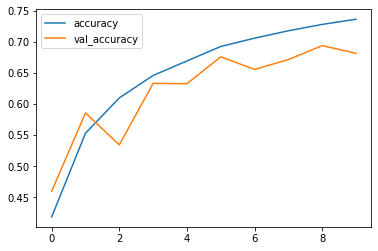

In [ ]:
losses[['accuracy','val_accuracy']].plot();

**Step-12:** Plotting the **loss and val_loss**

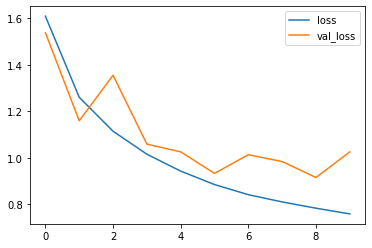

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:

print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose = 0))

['loss', 'accuracy']
[1.025085687637329, 0.6814000010490417]


## Classification report
  * It  is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

# Confusion- matrix
   * A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(x_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.69      0.92      0.79      1000
           2       0.73      0.39      0.51      1000
           3       0.56      0.41      0.47      1000
           4       0.66      0.65      0.66      1000
           5       0.54      0.65      0.59      1000
           6       0.65      0.84      0.74      1000
           7       0.83      0.65      0.73      1000
           8       0.72      0.83      0.77      1000
           9       0.75      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



In [ ]:
confusion_matrix(y_test,predict_classes)

array([[662,  24,  90,  35,  15,  15,  40,  23,  74,  22],
       [ 83, 649,  17,  44,   4,  12,  43,  22,  34,  92],
       [ 68,   6, 462, 139,  83,  60, 110,  52,  13,   7],
       [ 27,   6,  88, 509,  33, 123, 147,  49,   6,  12],
       [ 40,   5, 131, 100, 399,  38, 180,  97,  10,   0],
       [ 15,   3,  85, 265,  37, 418,  90,  74,   6,   7],
       [  9,   6,  59,  90,  30,  11, 769,  19,   5,   2],
       [ 31,   3,  39, 100,  52,  54,  51, 662,   1,   7],
       [154,  36,  33,  65,   7,  13,  19,  11, 635,  27],
       [104, 120,  17,  64,   2,  10,  57,  56,  45, 525]])

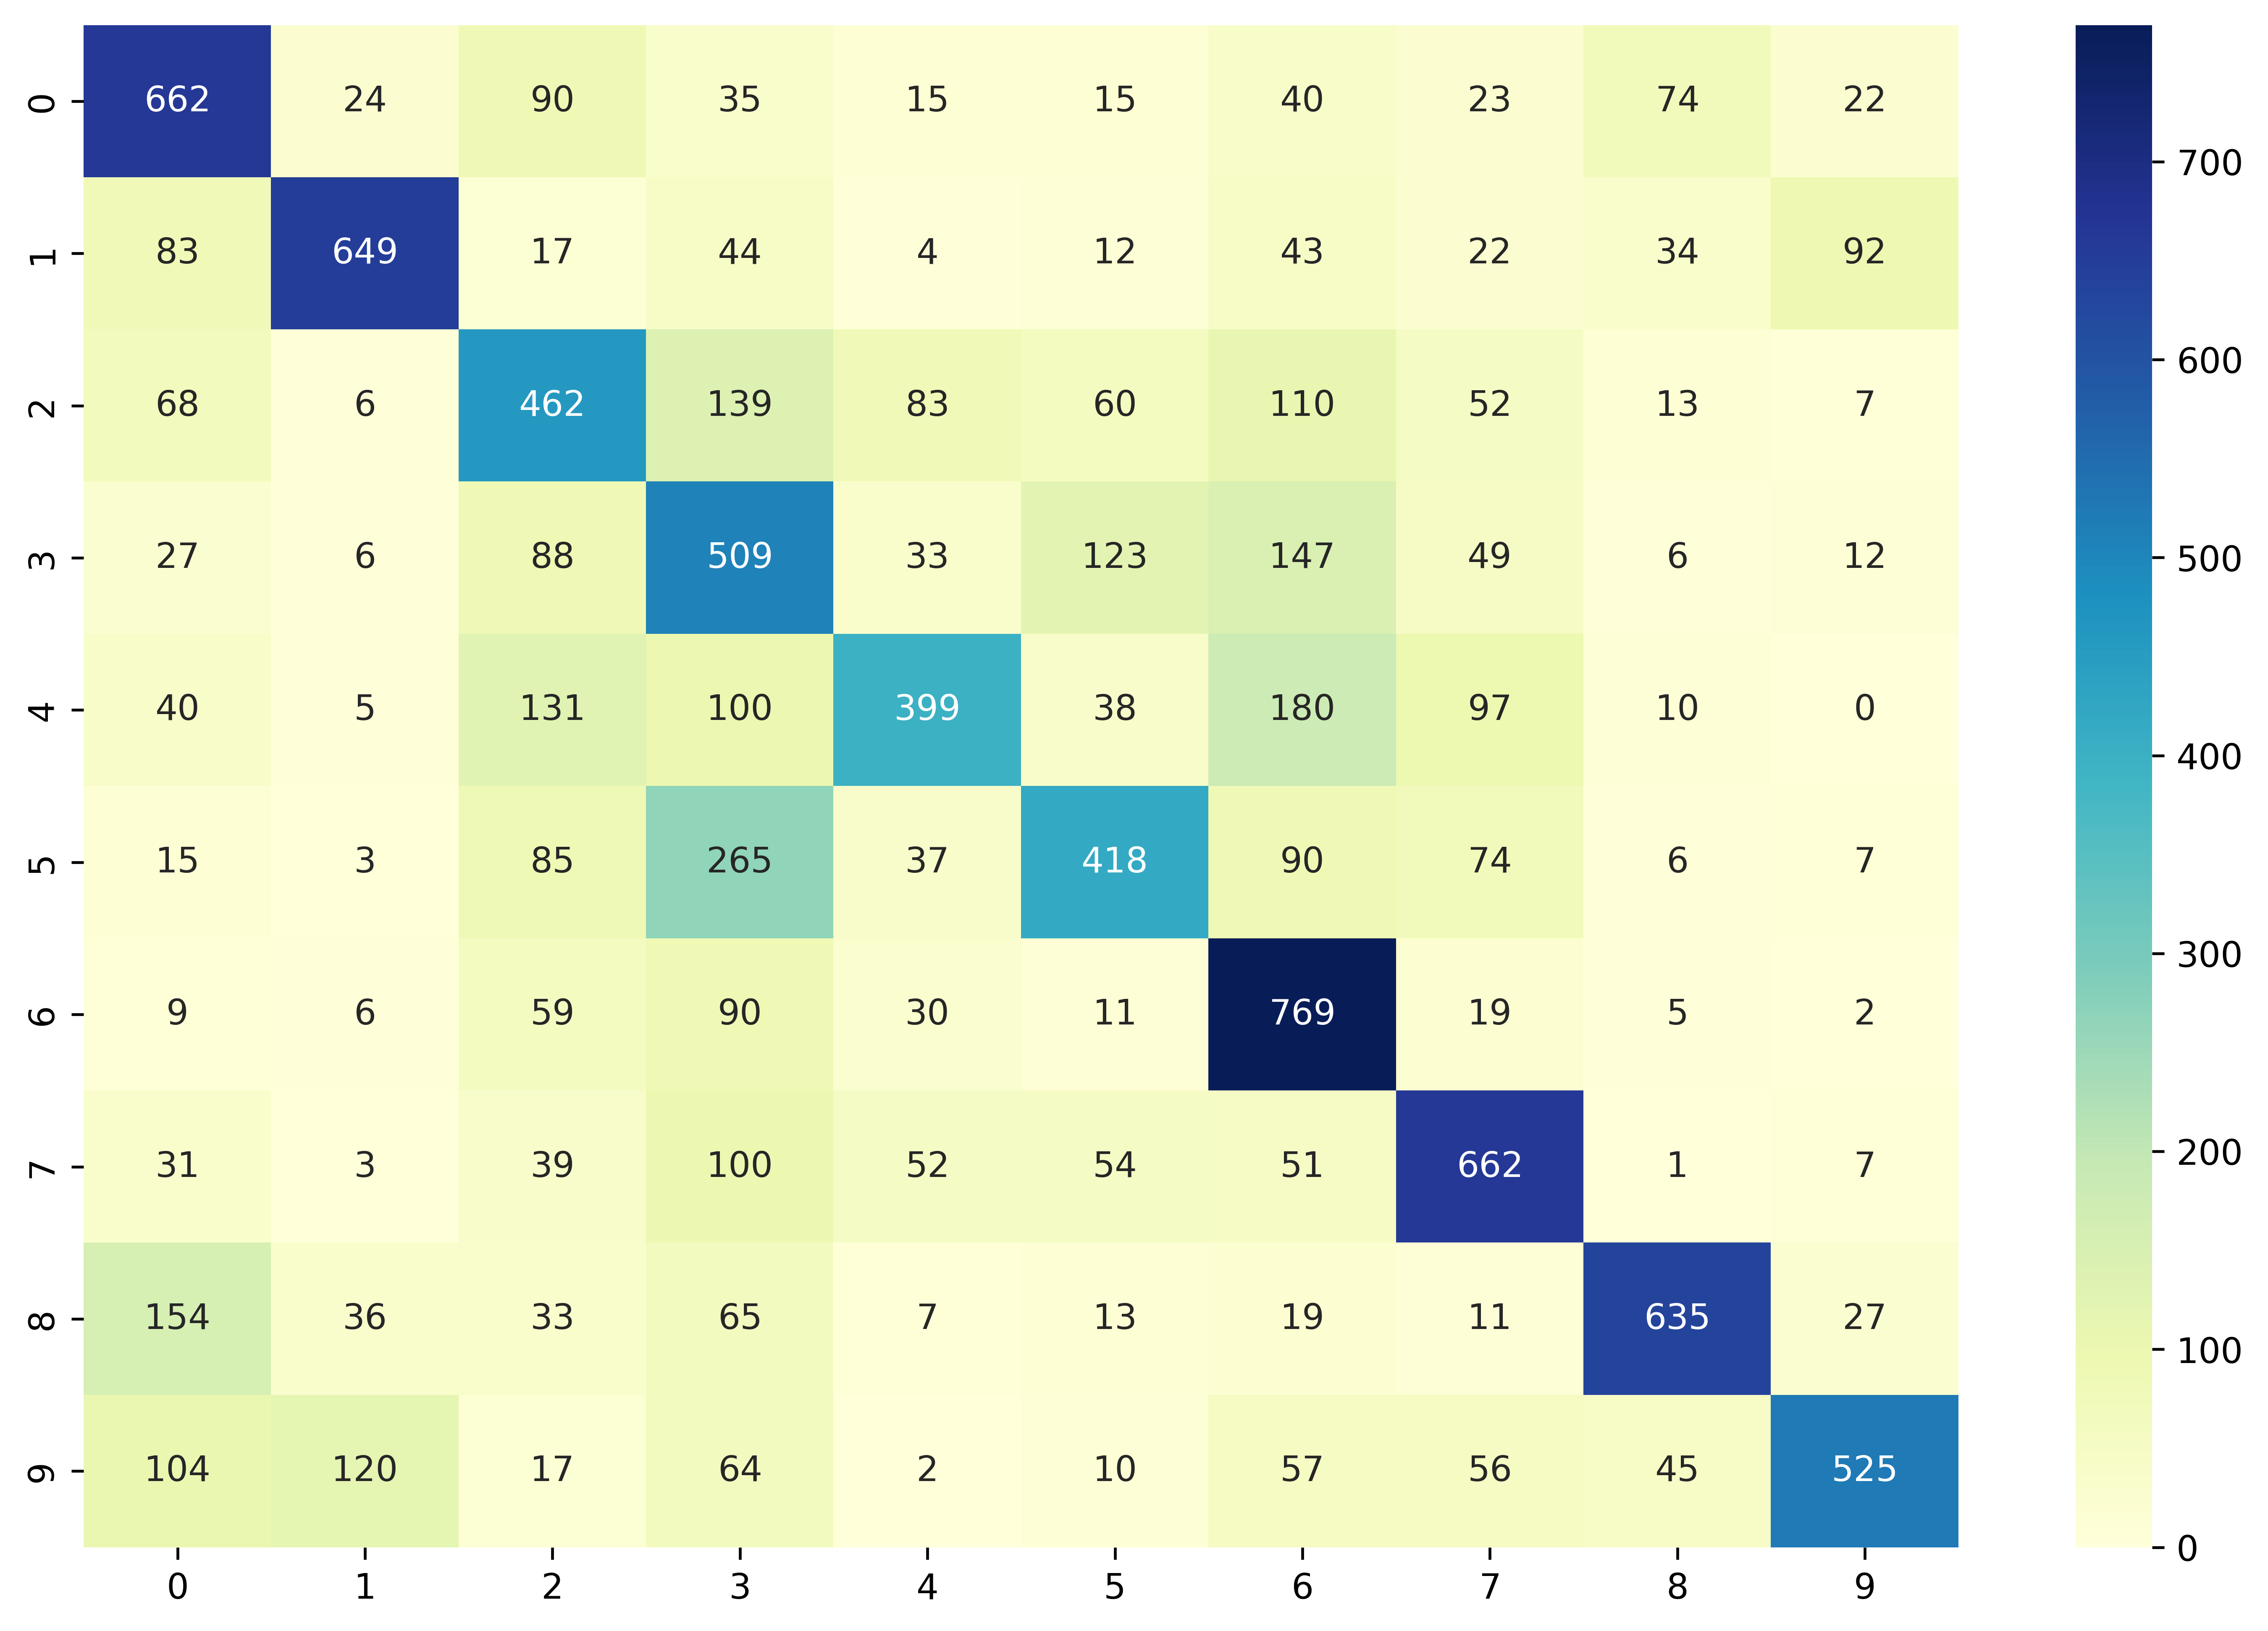

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8), dpi = 600)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

**Predicting a given image**

In [ ]:
my_image = x_test[10]

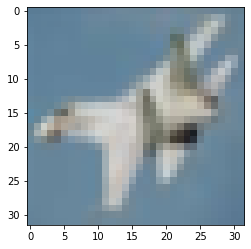

In [ ]:
plt.imshow(my_image)

In [ ]:
my_image = x_test[7]

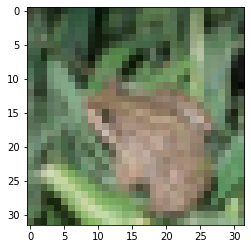

In [ ]:
plt.imshow(my_image)

In [ ]:
np.set_printoptions(formatter = {'float_kind': '{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 17ms/step


array([[0.002446, 0.000425, 0.154950, 0.107066, 0.472582, 0.053808,
        0.196940, 0.011118, 0.000334, 0.000330]], dtype=float32)

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million 